In [8]:
"""
Eager execution makes TensorFlow evaluate operations immediately, returning concrete values instead of creating a computational graph that is executed later.
If you are used to a REPL or the python interactive console, this feels familiar.
Eager execution is available in Tensorlow >=1.8.
"""

'\nEager execution makes TensorFlow evaluate operations immediately, returning concrete values instead of creating a computational graph that is executed later.\nIf you are used to a REPL or the python interactive console, this feels familiar.\nEager execution is available in Tensorlow >=1.8.\n'

In [9]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

print("Tensorflow version: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))


ValueError: tf.enable_eager_execution must be called at program startup.

In [10]:
train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                          origin=train_dataset_url)
print("local copy of the dataset file: {}".format(train_dataset_fp))

local copy of the dataset file: C:\Users\09659\.keras\datasets\iris_training.csv


In [40]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Labels: {}".format(label_name))

class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Labels: species


In [12]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(train_dataset_fp,
                                                 batch_size,
                                                 column_names=column_names,
                                                 label_name=label_name,
                                                 num_epochs=1)


In [13]:
features, labels = next(iter(train_dataset))
features

OrderedDict([('sepal_length',
              <tf.Tensor: id=119, shape=(32,), dtype=float32, numpy=
              array([ 6.5       ,  4.9000001 ,  5.5       ,  6.5       ,  6.        ,
                      4.5       ,  5.69999981,  6.69999981,  5.5999999 ,  4.4000001 ,
                      5.69999981,  5.5       ,  5.0999999 ,  6.5999999 ,  6.        ,
                      5.4000001 ,  5.        ,  7.        ,  5.        ,  5.0999999 ,
                      5.19999981,  6.30000019,  7.69999981,  7.19999981,  6.0999999 ,
                      5.        ,  4.80000019,  6.4000001 ,  5.4000001 ,  6.9000001 ,
                      5.5999999 ,  5.80000019], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=120, shape=(32,), dtype=float32, numpy=
              array([ 2.79999995,  2.4000001 ,  2.4000001 ,  3.20000005,  2.20000005,
                      2.29999995,  4.4000001 ,  3.0999999 ,  2.5       ,  2.9000001 ,
                      3.        ,  2.5999999 ,  3

In [14]:
plt.scatter(features['petal_length'],
           features['sepal_length'],
           c=labels,
           cmap='viridis')

plt.xlabel('Petal length')
plt.ylabel('sepal length')

TypeError: object of type 'EagerTensor' has no len()

In [15]:
def pack_features_vector(features, labels):
    
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

#train_dataset = train_dataset.map(pack_features_vector)


In [16]:
train_dataset = train_dataset.map(pack_features_vector)


In [17]:
features, labels = next(iter(train_dataset))

print(features[:5])
print(labels[:5])

tf.Tensor(
[[ 5.4000001   3.9000001   1.70000005  0.40000001]
 [ 6.69999981  3.          5.19999981  2.29999995]
 [ 7.30000019  2.9000001   6.30000019  1.79999995]
 [ 6.19999981  2.20000005  4.5         1.5       ]
 [ 5.          3.29999995  1.39999998  0.2       ]], shape=(5, 4), dtype=float32)
tf.Tensor([0 2 2 1 0], shape=(5,), dtype=int32)


In [18]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [19]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=252, shape=(5, 3), dtype=float32, numpy=
array([[ 1.92374039, -0.39545727,  0.35699278],
       [ 3.29255581, -0.4539814 ,  0.68373084],
       [ 3.65875244, -0.45331156,  0.78453541],
       [ 2.78266883, -0.38300765,  0.58539021],
       [ 1.70411062, -0.36787903,  0.3127287 ]], dtype=float32)>

In [20]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=258, shape=(5, 3), dtype=float32, numpy=
array([[ 0.7650668 ,  0.07524621,  0.15968698],
       [ 0.911394  ,  0.02150828,  0.06709774],
       [ 0.93211031,  0.01526232,  0.05262725],
       [ 0.86708415,  0.03657846,  0.09633749],
       [ 0.72744924,  0.0916113 ,  0.18093942]], dtype=float32)>

In [21]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [0 2 2 1 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 2 0 2 0 0 0 0 2 2 1 2]


In [22]:
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 1.5587873458862305


In [23]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

global_step = tf.train.get_or_create_global_step()

In [25]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.5587873458862305
Step: 1,         Loss: 1.4255130290985107


In [26]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()
    
    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.variables), global_step)
        
        epoch_loss_avg(loss_value)
        epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)
        
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.536, Accuracy: 35.000%
Epoch 050: Loss: 0.417, Accuracy: 84.167%
Epoch 100: Loss: 0.265, Accuracy: 97.500%
Epoch 150: Loss: 0.179, Accuracy: 97.500%
Epoch 200: Loss: 0.134, Accuracy: 98.333%


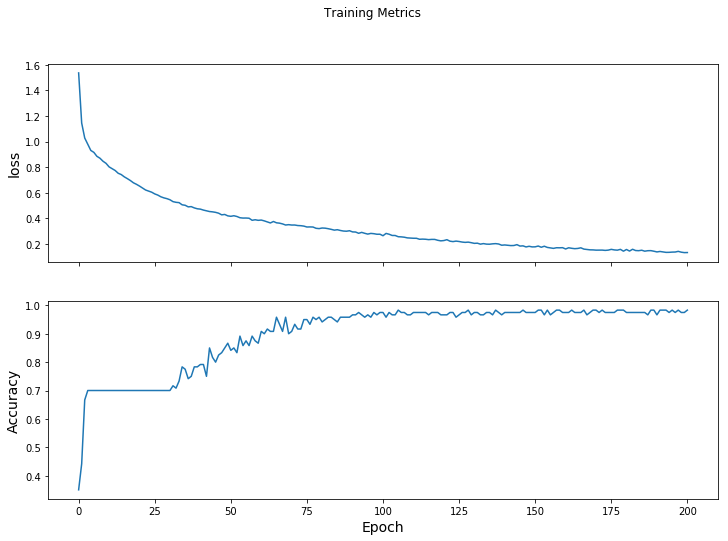

In [27]:
%matplotlib inline

fig, axes = plt.subplots(2, sharex=True, figsize=(12,8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

In [29]:
test_url = "http://download.tensorflow.org/data/iris_test.csv"
test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url), origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [31]:
test_dataset = tf.contrib.data.make_csv_dataset(train_dataset_fp,
                                               batch_size,
                                               column_names=column_names,
                                               label_name='species',
                                               num_epochs=1,
                                               shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [35]:
test_accuracy = tfe.metrics.Accuracy()

for (x,y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 97.500%


In [36]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=115547, shape=(24, 2), dtype=int32, numpy=
array([[0, 0],
       [2, 2],
       [1, 2],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1]])>

In [41]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5],
    [5.9, 3.0, 4.2, 1.5],
    [6.9, 3.1, 5.4, 2.1],
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))
    

Example 0 prediction: Iris setosa (97.9%)
Example 1 prediction: Iris versicolor (85.4%)
Example 2 prediction: Iris virginica (80.1%)
